## PROJETO 2 - CIÊNCIA DOS DADOS

Alunos: Ykaro de Sousa Andrade
Rodrigo de Lima Azeredo

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
dados = pd.read_csv('water_potability.csv')
dados

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [15]:
dados.isnull().sum() # valores nulos no dataset (isso prejudica minha informação) 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
# A função dropna () do Pandas DataFrame é usada para remover linhas e colunas com valores Null / NaN
dados = dados.dropna()
dados.shape

(2011, 10)

In [17]:
dados.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [18]:
# como só temos dados numéricos, utilizar scatter plot
# Vamos visualizar algumas medidas numéricas em relação a potabilidade da água
potavel = dados.loc[dados.Potability == 1, :]
n_potavel = dados.loc[dados.Potability == 0, :]

In [47]:
potavel.ph.describe()

count    811.000000
mean       7.113791
std        1.437623
min        0.227499
25%        6.256039
50%        7.046549
75%        7.955161
max       11.898078
Name: ph, dtype: float64

In [48]:
n_potavel.ph.describe()

count    1200.000000
mean        7.067201
std         1.659106
min         1.431782
25%         5.982888
50%         6.992004
75%         8.141979
max        14.000000
Name: ph, dtype: float64

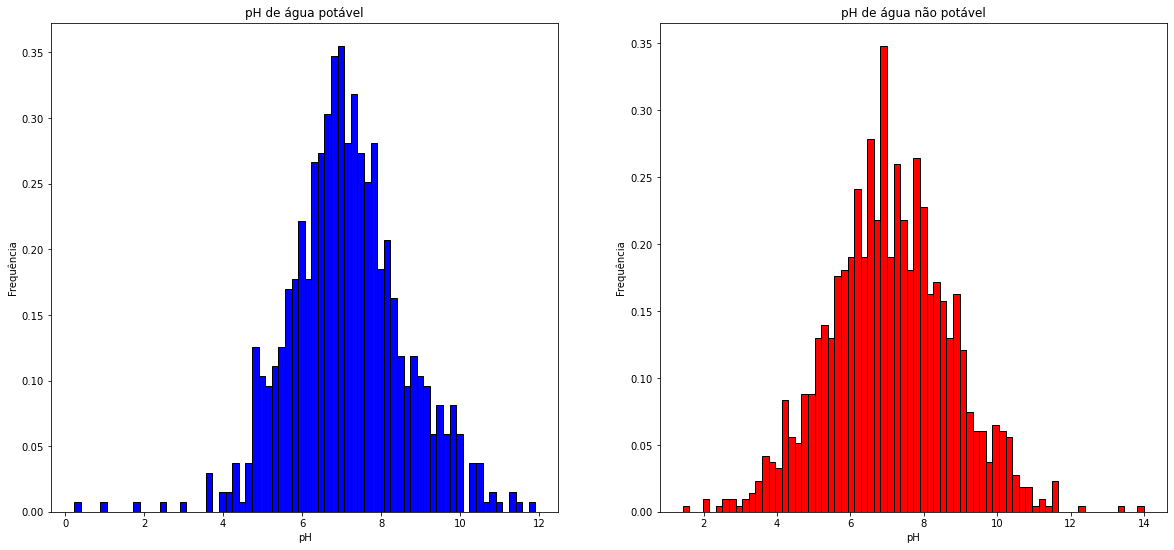

In [29]:
# iremos analisar agora alguns dos fatores, sua influência e como eles afetam a potabilidade da água
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.ph, bins = 70, edgecolor = 'black', color = 'blue', density = True)
plt.title('pH de água potável')
plt.xlabel('pH')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.ph, bins = 70, edgecolor = 'black', color = 'red',  density = True)
plt.title('pH de água não potável')
plt.xlabel('pH')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Podemos observar que o pH da água potável se encontra majoritariamente no intervalo de 6 a 8
# Já o pH da água não potável possui uma distribuição mais espalhada ao longo da faixa de pH

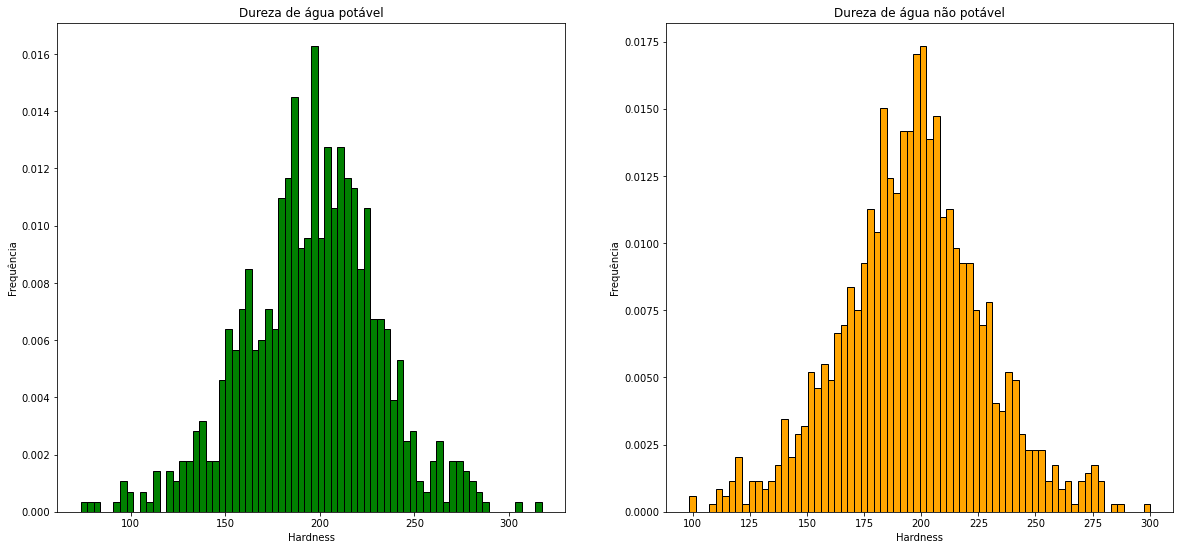

In [37]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Hardness, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Dureza de água potável')
plt.xlabel('Hardness')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Hardness, bins = 70, edgecolor = 'black', color = 'orange', density = True)
plt.title('Dureza de água não potável')
plt.xlabel('Hardness')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Podemos observar que a dureza da água não potável é maior que a da potável
# Sendo este um possível fator para diferenciar a potabilidade da água

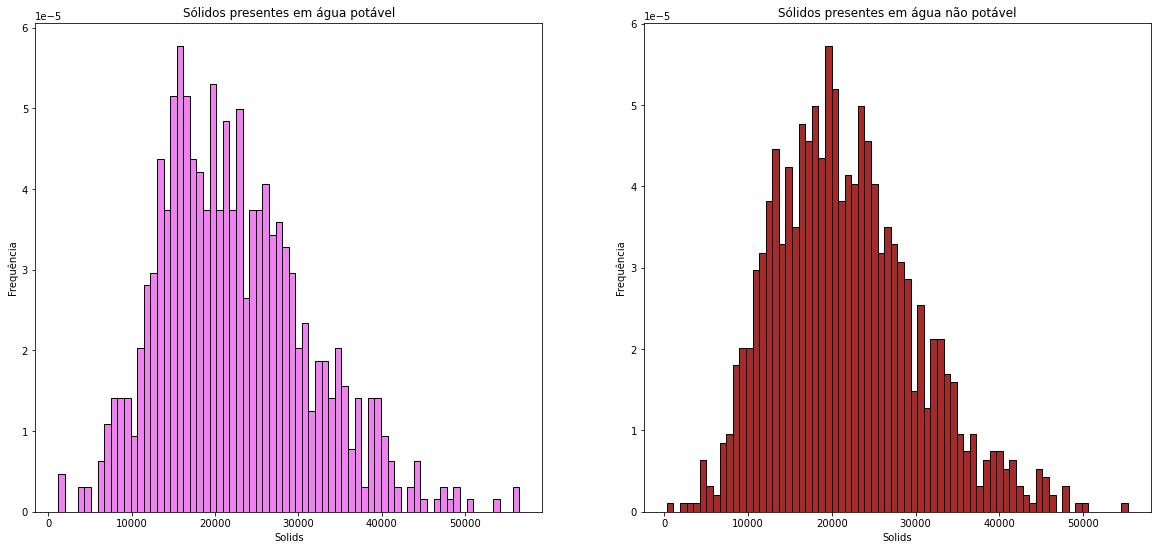

In [38]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Solids, bins = 70, edgecolor = 'black', color = 'violet', density = True)
plt.title('Sólidos presentes em água potável')
plt.xlabel('Solids')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Solids, bins = 70, edgecolor = 'black', color = 'brown', density = True)
plt.title('Sólidos presentes em água não potável')
plt.xlabel('Solids')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# A presença de particulas sólidas aparentemente não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

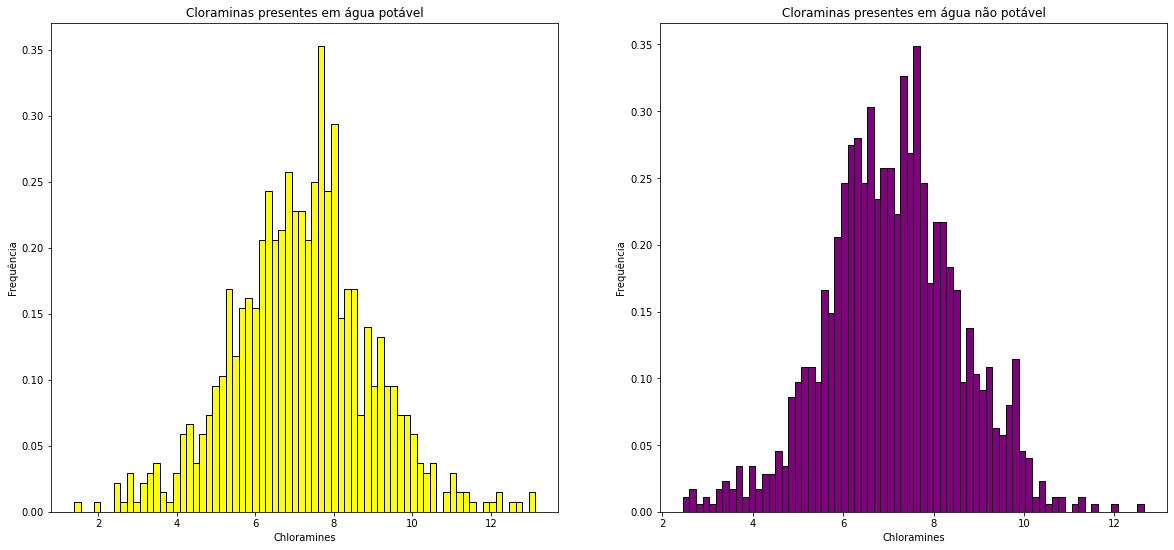

In [39]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Chloramines, bins = 70, edgecolor = 'black', color = 'yellow', density = True)
plt.title('Cloraminas presentes em água potável')
plt.xlabel('Chloramines')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Chloramines, bins = 70, edgecolor = 'black', color = 'purple', density = True)
plt.title('Cloraminas presentes em água não potável')
plt.xlabel('Chloramines')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# A presença de cloraminas não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

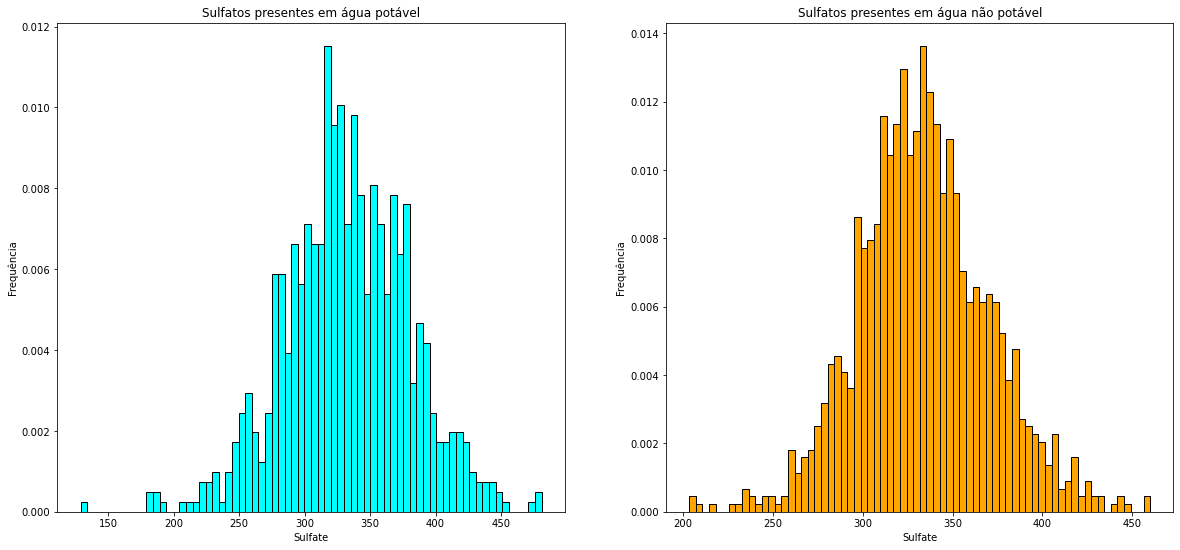

In [40]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Sulfate, bins = 70, edgecolor = 'black', color = 'cyan', density = True)
plt.title('Sulfatos presentes em água potável')
plt.xlabel('Sulfate')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Sulfate, bins = 70, edgecolor = 'black', color = 'orange', density = True)
plt.title('Sulfatos presentes em água não potável')
plt.xlabel('Sulfate')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Através dos gráficos podemos observar que a frequência da presença de sulfatos é maior na água não potável
# Logo a presença de sulfatos pode ser um indicador de potabilidade 

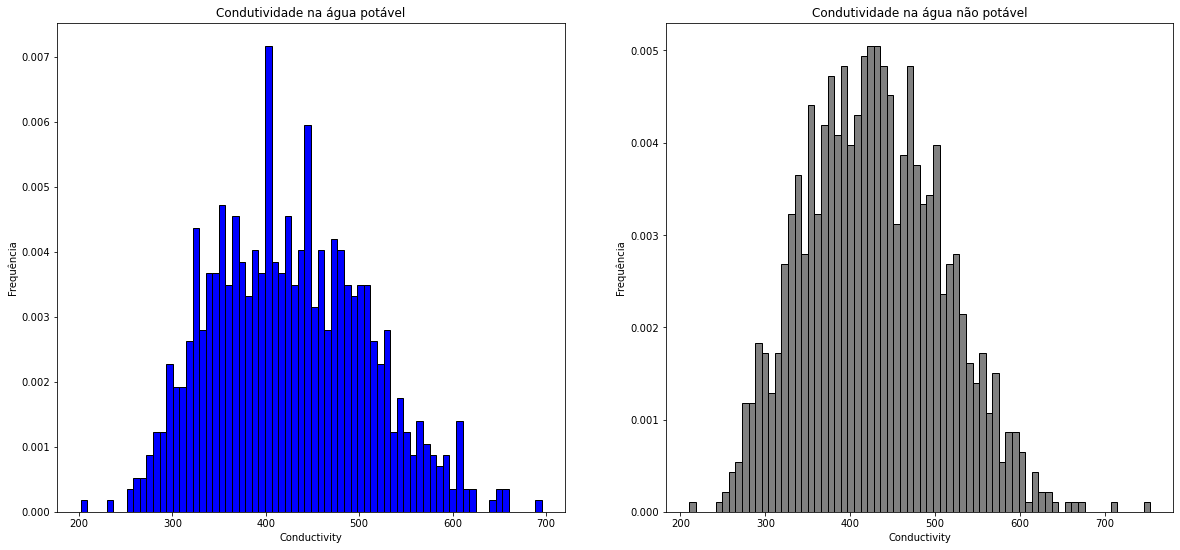

In [41]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Conductivity, bins = 70, edgecolor = 'black', color = 'blue', density = True)
plt.title('Condutividade na água potável')
plt.xlabel('Conductivity')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Conductivity, bins = 70, edgecolor = 'black', color = 'grey', density = True)
plt.title('Condutividade na água não potável')
plt.xlabel('Conductivity')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Podemos observar que os gráficos de condutividade entre a água potável e não potável são bem distintos.
# Sendo que a presença de condutividade pode ser um fator para distinguir a potabilidade

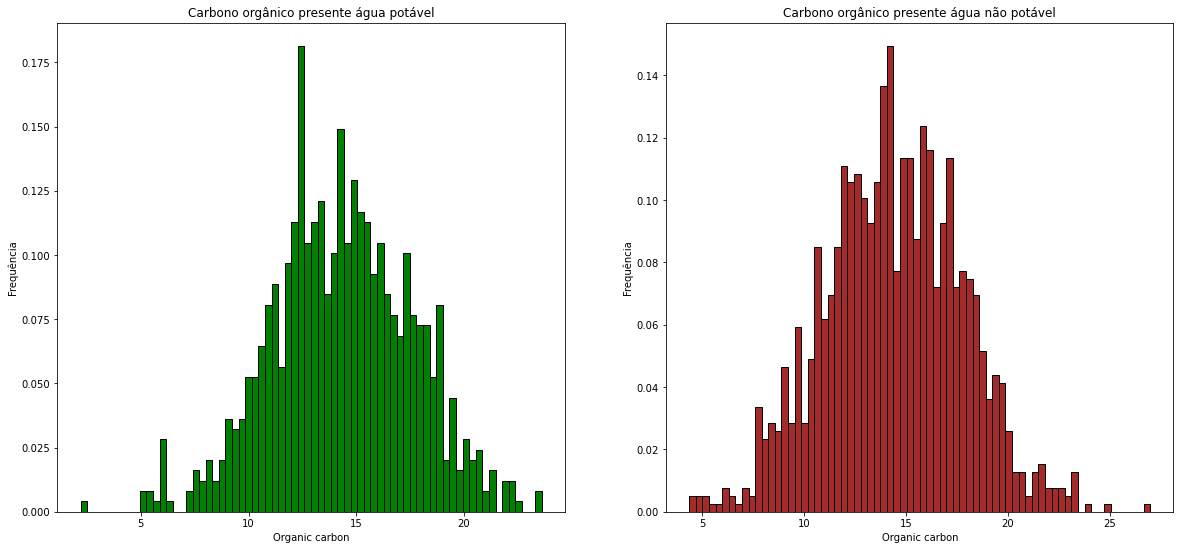

In [44]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Organic_carbon, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Carbono orgânico presente água potável')
plt.xlabel('Organic carbon')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Organic_carbon, bins = 70, edgecolor = 'black', color = 'brown', density = True)
plt.title('Carbono orgânico presente água não potável')
plt.xlabel('Organic carbon')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Podemos observar nos gráficos que a frequência de presença de carbono orgânico é maior na água não potável.
# Sendo este um possível fator para diferenciar a potabilidade da água

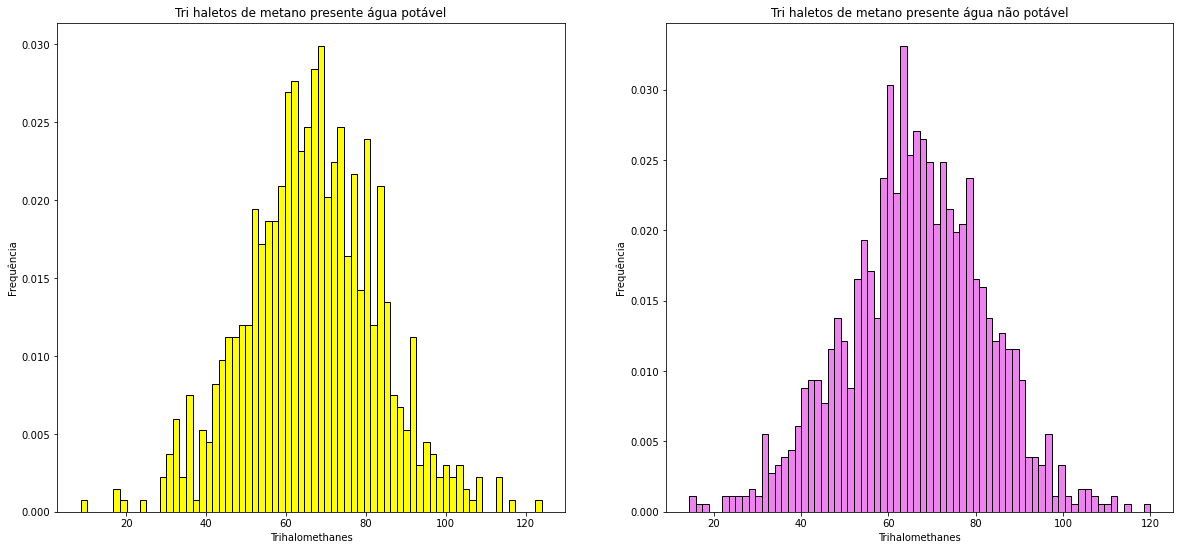

In [45]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Trihalomethanes, bins = 70, edgecolor = 'black', color = 'yellow', density = True)
plt.title('Tri haletos de metano presente água potável')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Trihalomethanes, bins = 70, edgecolor = 'black', color = 'violet', density = True)
plt.title('Tri haletos de metano presente água não potável')
plt.xlabel('Trihalomethanes')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# A presença de Tri haletos de metano não é um fator determinante para sabermos se a água é potável ou não.
# Pois podemos observar que ambas as ditribuições seguem um padrão semelhante 

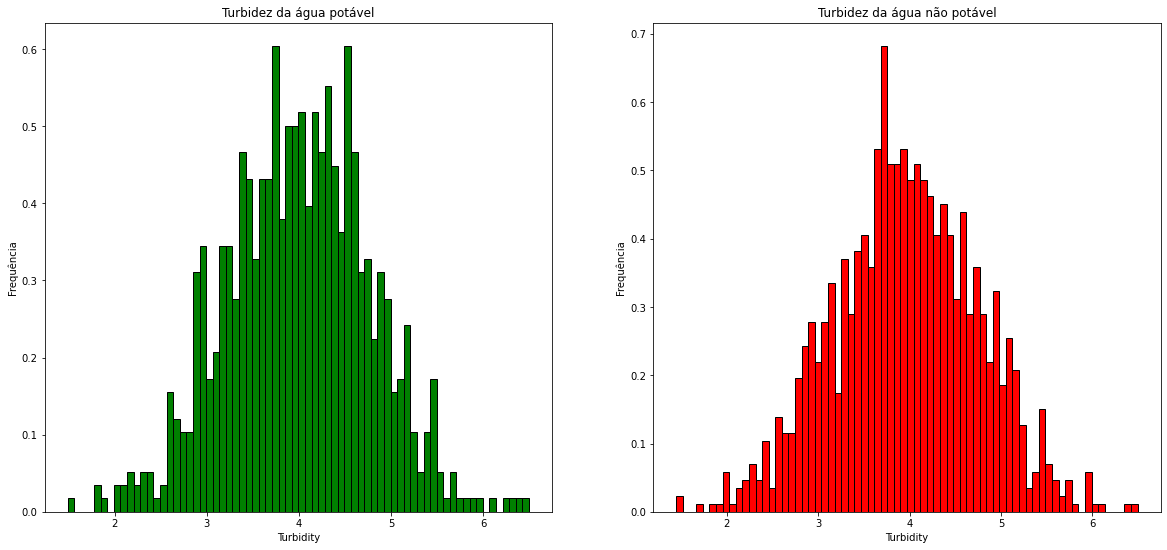

In [46]:
plt.figure(figsize = (20,9))
plt.subplot(121)
plt.hist(potavel.Turbidity, bins = 70, edgecolor = 'black', color = 'green', density = True)
plt.title('Turbidez da água potável')
plt.xlabel('Turbidity')
plt.ylabel('Frequência')

plt.subplot(122)
plt.hist(n_potavel.Turbidity, bins = 70, edgecolor = 'black', color = 'red', density = True)
plt.title('Turbidez da água não potável')
plt.xlabel('Turbidity')
plt.ylabel('Frequência')

plt.show()

In [ ]:
# Através dos gráficos podemos observar que a turbidez possui uma frequência maior no gráfico da água não potável
# Podendo este ser um fator determinate para analisarmos se a água é potável ou não